In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import math 

In [2]:
df = pd.read_csv(r'C:\Users\harr1\Downloads\V0_BENT_LPI.csv')                                               #######
print (df.info())

C:\Users\harr1\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229198 entries, 0 to 229197
Data columns (total 31 columns):
OBJECTID           229198 non-null int64
ROUNDID            229198 non-null int64
MISSIONID          229198 non-null object
REGION_NAME        229198 non-null object
ISLAND             229198 non-null object
SITEVISITID        229198 non-null int64
SITE               229198 non-null object
LATITUDE           229184 non-null float64
LONGITUDE          229184 non-null float64
REEF_ZONE          229198 non-null object
DEPTH_BIN          224864 non-null object
MIN_Z_M            209939 non-null float64
MAX_Z_M            209939 non-null float64
DATE_              229198 non-null object
OBS_YEAR           229198 non-null int64
LPITRANSECTRUN     229198 non-null int64
DIVER              229198 non-null object
MINDEPTH           180610 non-null float64
MAXDEPTH           182488 non-null float64
METHODCODE         229198 non-null int64
CALIBRATION        99078 non-null float64
TRANNUM

In [3]:
#Drop columns that are not important                                                                                                       
df = df.drop(['MINDEPTH', 'MAXDEPTH', 'CALIBRATION', 'MIN_Z_M', 'MAX_Z_M', 'OBJECTID', 'ROUNDID',
             'TRANNUM', 'LPI_SEG', 'METHODCODE'], axis=1)
#No information about how 2009 data collected, so drop this year from dataset
df = df[df['OBS_YEAR']!=2009]
#Only interested in corals, so eliminate anything that is not a coral
df = df[df['BENTHICCATEGORY'] == 'CORL']
#Drop nulls
df= df.dropna()

In [4]:
#Get dummies for island, region, family, diver, and reef zone                                         
df = pd.concat([df, df['FAMILY'].str.get_dummies(sep=',')], axis=1)
df = pd.concat([df, df['ISLAND'].str.get_dummies(sep=',')], axis=1)
df = pd.concat([df, df['REEF_ZONE'].str.get_dummies(sep=',')], axis=1)
df = pd.concat([df, df['REGION_NAME'].str.get_dummies(sep=',')], axis=1)
df = pd.concat([df, df['DIVER'].str.get_dummies(sep=',')], axis = 1)

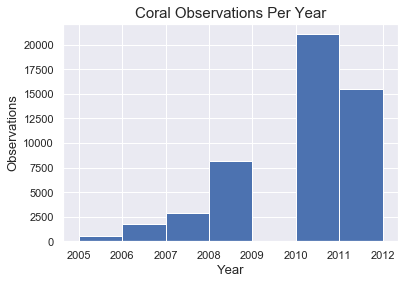

In [5]:
#How many observations were taken per year? This does not count the total number of corals, just the observations of them.
#For example, if a diver found 2 corals at the same location, it counts as one in this graph
plt.hist(df['OBS_YEAR'], bins = 7)
plt.title('Coral Observations Per Year', fontsize = 15)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Observations', fontsize =13)
plt.show()

In [6]:
#convert date from dd-ABREV-yyyy to yyyymmdd                                                                     ####

from datetime import datetime

df['Date']= [datetime.strptime(x, '%d-%b-%y').strftime('%Y-%m-%d') for x in df['DATE_']]

df['Month'] = [datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m') for x in df['Date']]

for x in df['Date']:
    x.replace("-", "")
    
for y in df['Month']:
    y.replace("-", "")
    

#Sort values as they are out of order in the original dataframe
df_sorted = df.sort_values('Date')




In [7]:
#Calculate the Transects taken per day
#Calculate the total number of corals found per day

df_sorted['Transect/day'] = df_sorted['LPITRANSECTRUN'].groupby(df_sorted['Date']).transform('nunique')                         ######
df_sorted['Coral/day'] = df_sorted['COUNT'].groupby(df_sorted['Date']).transform('sum')


In [8]:
# Transforming data based on samples taken during observations                                     

# Since 2005-2008 data was collected every 50cm and 2010-2012 data collected every 20cm, we need to standardize the data
# 2005-2008 data multiplied by 2.5 as there were 2.5X fewer observations made per transect. Data divided by number 
# of transects taken per day to standardize how many corals found per meter

df_2005 = df_sorted[df_sorted['Date']<='2008-12-31']
df_2010 = df_sorted[df_sorted['Date']>'2009-12-31']


df_2005['Coral/m']= (((df_2005['Coral/day']*2.5)/df_2005['Transect/day'])/25)
df_2010['Coral/m']= (((df_2010['Coral/day'])/df_2010['Transect/day'])/25)



C:\Users\harr1\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\harr1\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [9]:
#Add the transformed data back into the sorted dataframe
df_sorted= pd.concat([df_2005, df_2010], axis=0)
print (df_sorted['Coral/m'])

1         0.875000
98        0.875000
100       0.875000
105       0.875000
11        0.875000
96        0.875000
8         0.875000
5         0.875000
4         0.875000
3         0.875000
10        0.875000
93        1.550000
92        1.550000
89        1.550000
87        1.550000
84        1.550000
83        1.550000
81        1.550000
79        1.550000
77        1.550000
76        1.550000
55        1.550000
49        1.550000
94        1.550000
47        1.550000
52        1.550000
44        1.550000
74        1.150000
71        1.150000
58        1.150000
            ...   
211918    1.266667
211865    1.266667
211790    1.266667
211864    1.266667
211855    1.266667
211797    1.266667
211798    1.266667
211799    1.266667
211800    1.266667
211805    1.266667
211806    1.266667
211812    1.266667
211816    1.266667
211822    1.266667
211824    1.266667
211825    1.266667
211832    1.266667
211833    1.266667
211834    1.266667
211837    1.266667
211838    1.266667
211839    1.

C:\Users\harr1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


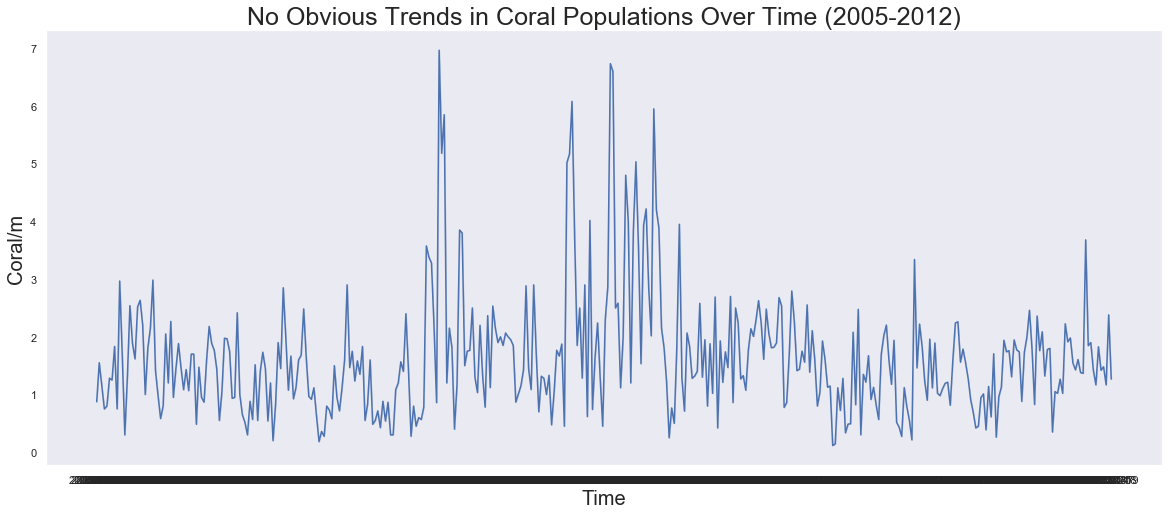

In [10]:
#Plotting the coral population over the course of the study

plt.figure(figsize=(20, 8))
ax = sns.lineplot(x= 'Date', y= 'Coral/m', data = df_sorted)
sns.axes_style("whitegrid")
ax.grid(False)
plt.title('No Obvious Trends in Coral Populations Over Time (2005-2012)', fontsize = 25)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Coral/m', fontsize = 20)
plt.show()



## Coral Populations VS Region over time

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df_sorted.groupby(['Date','REGION_NAME'])['Coral/m'].mean().unstack().plot(ax=ax)
plt.title('Coral Population Counts Vary By Region', fontsize=27)
ax.grid(False)
plt.ylabel('Coral/m', fontsize = 20)
plt.xlabel('Time', fontsize = 20)
plt.show()

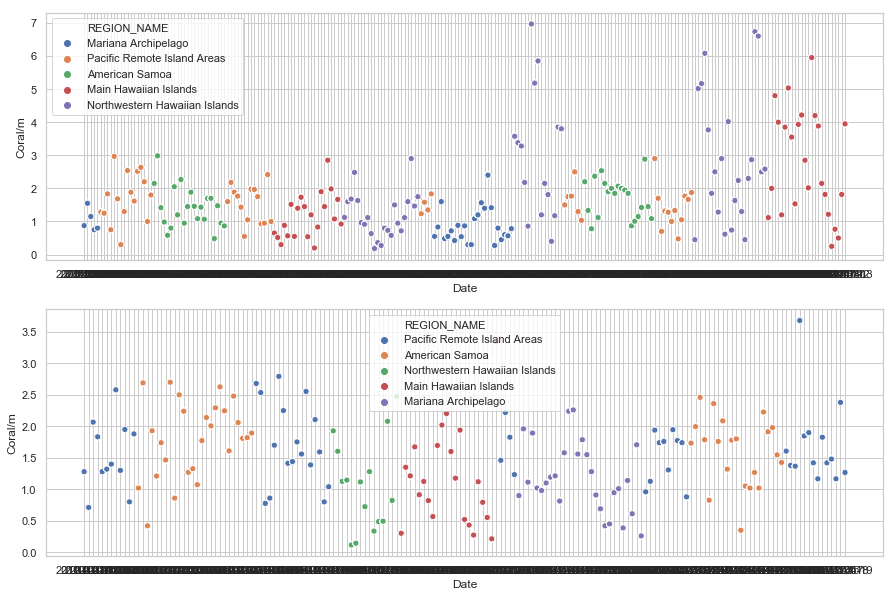

In [11]:
#Plotting Coral Population per region, breaking the data down into the two separate studies

sns.set_style("whitegrid")
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
ax = sns.scatterplot(x='Date', y='Coral/m', hue='REGION_NAME', data=df_2005)
plt.title = ('Coral/day WITH REGIONS 2005')

plt.subplot(2,1,2)
ax = sns.scatterplot(x='Date', y='Coral/m', hue='REGION_NAME', data=df_2010)

plt.title = ('Coral/day WITH REGIONS 2010')


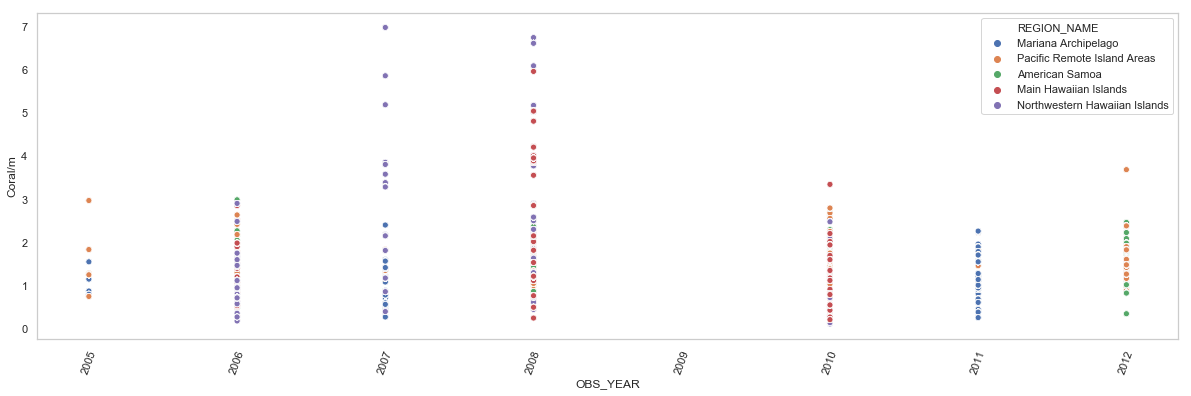

In [14]:
#Coral population per region per year, scatterplot
sns.set_style("whitegrid")
plt.figure(figsize=(45,6))

plt.subplot(1,2,1)
ax = sns.scatterplot(x='OBS_YEAR', y='Coral/m', hue='REGION_NAME', data=df_sorted)
ax.grid(False)


plt.xticks(rotation=70)
plt.show()


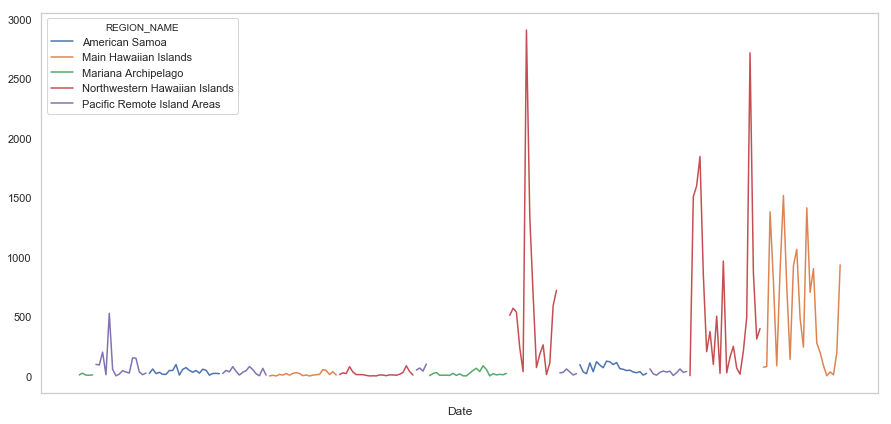

<Figure size 1080x504 with 0 Axes>

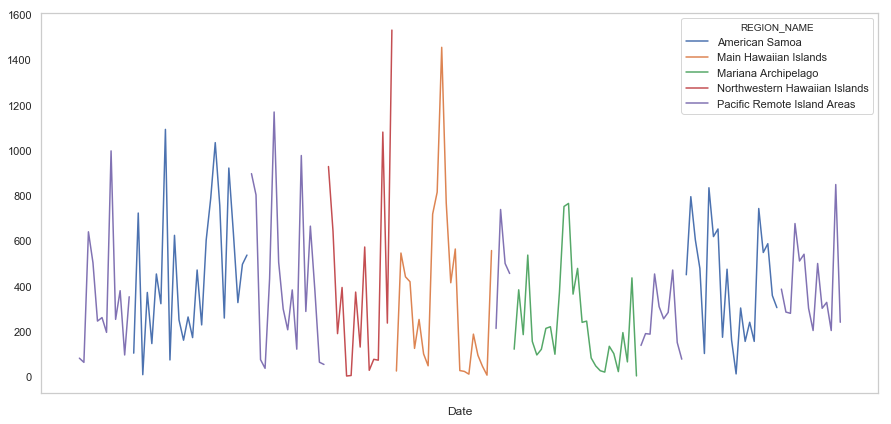

<Figure size 1080x504 with 0 Axes>

In [18]:
#Groupby Region and plot that over time


fig, ax = plt.subplots(figsize=(15,7))

plt.figure(figsize=(15,7))

df_2005.groupby(['Date','REGION_NAME']).sum()['Coral/m'].unstack().plot(ax=ax, label='2005')
ax.grid(False)
plt.show()

fig, ax = plt.subplots(figsize=(15,7))
plt.figure(figsize=(15,7))


df_2010.groupby(['Date','REGION_NAME']).sum()['Coral/m'].unstack().plot(ax=ax, label='2010')
ax.grid(False)
plt.show()

## Coral Population vs Diver over time

TypeError: 'str' object is not callable

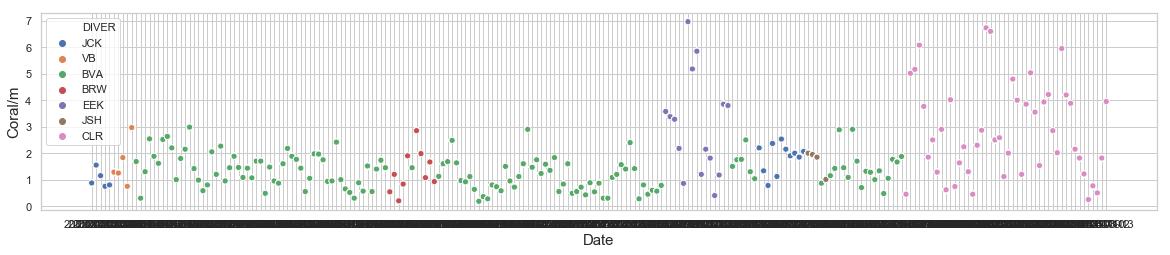

In [12]:
#Plotting Coral Population per diver, breaking the data down into the two separate studies

sns.set_style("whitegrid")
plt.figure(figsize=(20,8))

plt.subplot(2,1,1)
ax = sns.scatterplot(x='Date', y='Coral/m', hue='DIVER', data=df_2005)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Coral/m', fontsize = 15)
plt.title('Coral/m/day with Divers 2005-2008', fontsize = 20)
ax.grid(False)
ax.set(xticklabels=[])


plt.show()


sns.set_style("whitegrid")
plt.figure(figsize=(20,8))

plt.subplot(2,1,2)
ax = sns.scatterplot(x='Date', y='Coral/m', hue='DIVER', data=df_2010)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Coral/m', fontsize = 15)
plt.title('Coral/m/day with Divers 2010-2012', fontsize = 20)
ax.grid(False)
ax.set(xticklabels=[])


plt.show()


TypeError: 'str' object is not callable

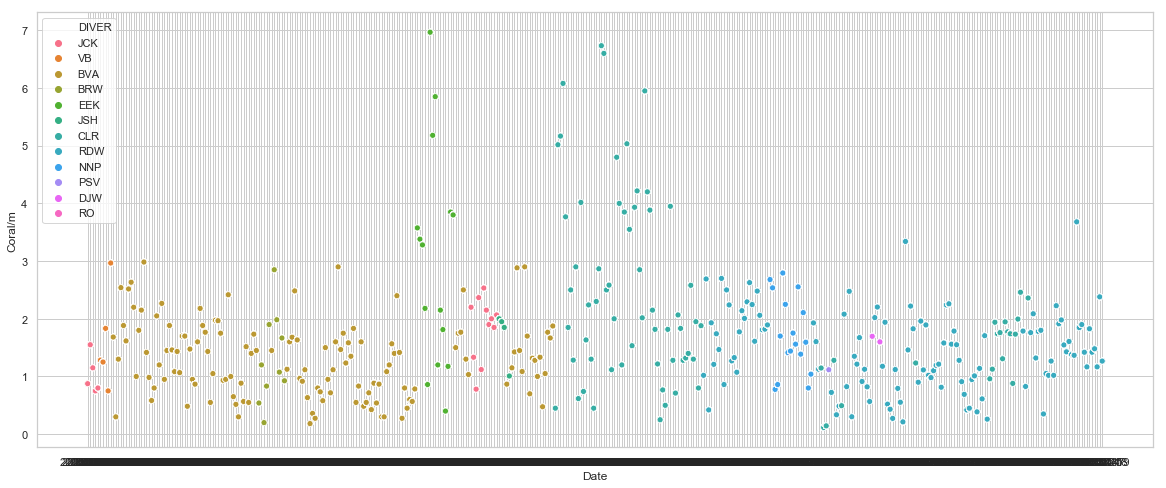

In [13]:
#Coral population per diver over course of whole study

sns.set_style("whitegrid")
plt.figure(figsize=(20,8))

ax = sns.scatterplot(x='Date', y='Coral/m', hue='DIVER', data=df_sorted)
plt.title('Coral Population Counts Vary Based on Diver', fontsize = 25)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Coral/m', fontsize = 20)
ax.grid(False)
ax.set(xticklabels=[])
plt.show()


## Coral Populations vs Coral Family over time

In [ ]:
#Coral Populations vs family, lineplot
fig, ax = plt.subplots(figsize=(15,7))
plt.figure(figsize=(15,7))
df_sorted.groupby(['Date','FAMILY']).mean()['Coral/m'].unstack().plot(ax=ax, label='upper right')
plt.show()

## Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
from sklearn.tree import DecisionTreeRegressor



In [ ]:
data = df[['OBS_YEAR',
           'LATITUDE', 
           'LONGITUDE', 
           #Reef zone
           'Forereef', 'Lagoon', 'Protected Slope', 'Backreef',
           #Families
           'Acroporidae', 'Agariciidae', 'Pocilloporidae', 'Faviidae', 'Siderastreidae',
 'Poritidae', 'Merulinidae', 'Milleporidae', 'Dendrophylliidae', 'Fungiidae',
 'Mussidae', 'Oculinidae', 'Pectiniidae', 'Helioporidae', 'Astrocoeniidae',
 'Caryophylliidae', 'Stylasteridae',
           #Divers
           'BVA', 'JCK', 'JSH', 'CLR', 'RDW', 'RO',
           #Islands
           'Guam', 'Santa Rosa', 'Wake', 'Hawaii', 'Kauai', 'Kaula', 'Lanai',
       'Lehua', 'Maui', 'Molokai', 'Niihau', 'Oahu', 'French Frigate',
       'Kure', 'Laysan', 'Lisianski', 'Maro', 'Midway', 'Necker',
       'Pearl & Hermes', 'Baker', 'Howland', 'Jarvis', 'Johnston',
       'Kingman', 'Palmyra', 'Ofu & Olosega', 'Rose', 'Swains', 'Tau',
       'Tutuila', 'Agrihan', 'Aguijan', 'Alamagan', 'Asuncion',
       'Farallon de Pajaros', 'Guguan', 'Maug', 'Pagan', 'Rota', 'Saipan',
       'Sarigan', 'Tinian',
           #Regions
           'Mariana Archipelago', 'Pacific Remote Island Areas',
       'Main Hawaiian Islands', 'Northwestern Hawaiian Islands',
       'American Samoa'
          ]]
target = df['Coral/m']
           

                

In [ ]:
data_names=['OBS_YEAR',
           'LATITUDE', 
           'LONGITUDE', 
           #Reef zone
           'Forereef', 'Lagoon', 'Protected Slope', 'Backreef',
           #Families
           'Acroporidae', 'Agariciidae', 'Pocilloporidae', 'Faviidae', 'Siderastreidae',
 'Poritidae', 'Merulinidae', 'Milleporidae', 'Dendrophylliidae', 'Fungiidae',
 'Mussidae', 'Oculinidae', 'Pectiniidae', 'Helioporidae', 'Astrocoeniidae',
 'Caryophylliidae', 'Stylasteridae',
           #Divers
           'BVA', 'JCK', 'JSH', 'CLR', 'RDW', 'RO',
           #Islands
           'Guam', 'Santa Rosa', 'Wake', 'Hawaii', 'Kauai', 'Kaula', 'Lanai',
       'Lehua', 'Maui', 'Molokai', 'Niihau', 'Oahu', 'French Frigate',
       'Kure', 'Laysan', 'Lisianski', 'Maro', 'Midway', 'Necker',
       'Pearl & Hermes', 'Baker', 'Howland', 'Jarvis', 'Johnston',
       'Kingman', 'Palmyra', 'Ofu & Olosega', 'Rose', 'Swains', 'Tau',
       'Tutuila', 'Agrihan', 'Aguijan', 'Alamagan', 'Asuncion',
       'Farallon de Pajaros', 'Guguan', 'Maug', 'Pagan', 'Rota', 'Saipan',
       'Sarigan', 'Tinian',
           #Regions
           'Mariana Archipelago', 'Pacific Remote Island Areas',
       'Main Hawaiian Islands', 'Northwestern Hawaiian Islands',
       'American Samoa'
          ]

In [ ]:
RandForest= ensemble.RandomForestRegressor()

RandForest.fit(data,target)

RandForest.feature_importances_
RandForest_ft_series = pd.Series(data=RandForest.feature_importances_, index=data.columns)
###################################
sorted_series = RandForest_ft_series.sort_values(ascending = False)
sorted_series

In [ ]:

corrmat = df_sorted.corr()
features=['BVA', 'LATITUDE', 'LONGITUDE', 'OBS_YEAR', 'CLR', 'Laysan', 'Rose', 'Molokai', 'Protected Slope', 'Maug', 'Coral/m']
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df_sorted[features].corr(),annot=True)

## Linear Regressions: NW Hawaiian vs Pacific Remote

In [ ]:
df_NWHI= df_sorted[df_sorted['REGION_NAME']=='Northwestern Hawaiian Islands']

print(df_NWHI['ISLAND'].unique())
print(df_NWHI['DIVER'].unique())

In [ ]:

data_NW = df_NWHI[[
                'LATITUDE', 
                'LONGITUDE', 
    'OBS_YEAR',
    'French Frigate', 'Kure', 'Laysan', 'Lisianski', 'Maro', 'Midway', 'Necker', 'Pearl & Hermes',
    'BVA', 'EEK', 'CLR', 'RDW', 'PSV']]

target_NW = df_NWHI['Coral/m']

data_NW_names=['LATITUDE', 
                'LONGITUDE', 
    'OBS_YEAR',
    'French Frigate', 'Kure', 'Laysan', 'Lisianski', 'Maro', 'Midway', 'Necker', 'Pearl & Hermes',
    'BVA', 'EEK', 'CLR', 'RDW', 'PSV']
############################################

regr_NW = linear_model.LinearRegression()

regr_NW.fit(data_NW, target_NW)

cross_variable_NW=cross_val_score(regr_NW, data_NW, target_NW, cv=10)
print('Cross Validation: \n', cross_variable_NW)
print ('Mean:', np.mean(cross_variable_NW))
print ('std:',np.std(cross_variable_NW))
print('Coefficients: \n', regr_NW.coef_)
print('Intercept: \n', regr_NW.intercept_)
print ('Regression score: \n', regr_NW.score(data_NW,target_NW))

In [ ]:
df_PRI= df_sorted[df_sorted['REGION_NAME']=='Pacific Remote Island Areas']

print(df_PRI['ISLAND'].unique())
print(df_PRI['DIVER'].unique())

In [ ]:


data_PRI = df_PRI[[
                'LATITUDE', 
                'LONGITUDE',
    'OBS_YEAR',
                'Wake', 'Baker', 'Howland', 'Jarvis', 'Johnston', 'Kingman', 'Palmyra',
    'VB',  'BVA', 'CLR', 'NNP', 'RDW'       
          ]]
target_PRI = df_PRI['Coral/m']

data_PRI_names = ['LATITUDE', 
                'LONGITUDE',
    'OBS_YEAR',
                'Wake', 'Baker', 'Howland', 'Jarvis', 'Johnston', 'Kingman', 'Palmyra',
    'VB',  'BVA', 'CLR', 'NNP', 'RDW'       
          ]
############################################

regr_PRI = linear_model.LinearRegression()

regr_PRI.fit(data_PRI, target_PRI)

cross_variable_PRI=cross_val_score(regr_PRI, data_PRI, target_PRI, cv=10)
print('Cross Validation: \n', cross_variable_PRI)
print ('Mean:', np.mean(cross_variable_PRI))
print ('std:',np.std(cross_variable_PRI))
print('Coefficients: \n', regr_PRI.coef_)
print('Intercept: \n', regr_PRI.intercept_)
print ('Regression score: \n', regr_PRI.score(data_PRI,target_PRI))

## Decision Tree 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data,target, test_size=.3, random_state = 20)    

regr_1 = DecisionTreeRegressor(max_depth=3)
regr_1.fit(data, target)


dot_data = tree.export_graphviz(
    regr_1, out_file=None,
    feature_names= data_names,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_NW,target_NW, test_size=.3, random_state = 20)    

tree_NW = DecisionTreeRegressor(max_depth=3)
tree_NW.fit(data_NW, target_NW)


dot_data = tree.export_graphviz(
    tree_NW, out_file=None,
    feature_names= data_NW_names,
    filled=True
)

cross_variable_NW=cross_val_score(tree_NW, data_NW, target_NW, cv=10)
print('Cross Validation: \n', cross_variable_NW)
print ('Mean:', np.mean(cross_variable_NW))
print ('std:',np.std(cross_variable_NW))
print ('Regression score: \n', tree_NW.score(data_NW,target_NW))

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_PRI,target_PRI, test_size=.3, random_state = 20)    

tree_PRI = DecisionTreeRegressor(max_depth=3)
tree_PRI.fit(data_PRI, target_PRI)


dot_data = tree.export_graphviz(
    tree_PRI, out_file=None,
    feature_names= data_PRI_names,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

cross_variable_PRI=cross_val_score(tree_PRI, data_PRI, target_PRI, cv=10)
print('Cross Validation: \n', cross_variable_PRI)
print ('Mean:', np.mean(cross_variable_PRI))
print ('std:',np.std(cross_variable_PRI))
print ('Regression score: \n', tree_PRI.score(data_PRI,target_PRI))

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Ridge Regression

In [ ]:
ridgeregr = linear_model.Ridge(alpha = 10, fit_intercept = False)
ridgeregr.fit(data, target)

cross_variable=cross_val_score(ridgeregr, data, target, cv=10)
print('Cross Validation, all data: \n', cross_variable)
print ('Mean all data:', np.mean(cross_variable))
print ('Stdv all data:',np.std(cross_variable))
print('Coefficients all data: \n', ridgeregr.coef_)
print('Intercept all data: \n', ridgeregr.intercept_)
print ('Regression score, all data: \n', ridgeregr.score(data,target))

ridge_NW = linear_model.Ridge(alpha = 10 , fit_intercept = False)
ridge_NW.fit(data_NW, target_NW)

cross_variable_NW=cross_val_score(ridge_NW, data_NW, target_NW, cv=10)
print('Cross Validation, NW: \n', cross_variable_NW)
print ('Mean, NW:', np.mean(cross_variable_NW))
print ('STdv NW:',np.std(cross_variable_NW))
print('Coefficients, NW: \n', ridge_NW.coef_)
print('Intercept, NW: \n', ridge_NW.intercept_)
print ('Regression score, NW: \n', ridge_NW.score(data_NW,target_NW))

ridge_PRI = linear_model.Ridge(alpha = 10 , fit_intercept = False)
ridge_PRI.fit(data_PRI, target_PRI)

cross_variable_PRI=cross_val_score(ridge_PRI, data_PRI, target_PRI, cv=10)
print('Cross Validation, PRI: \n', cross_variable_PRI)
print ('Mean, PRI:', np.mean(cross_variable_PRI))
print ('STdv PRI:',np.std(cross_variable_PRI))
print('Coefficients, PRI: \n', ridge_PRI.coef_)
print('Intercept, PRI: \n', ridge_PRI.intercept_)
print ('Regression score, PRI: \n', ridge_PRI.score(data_PRI,target_PRI))

## Log Regression

MNR = MultinomialNB() 
lr=LogisticRegression(C=1e9)

x_train, x_test, y_train, y_test = train_test_split(data,target, test_size=.3, random_state = 20)
print(lr.fit(data,target))
print('Log Regression:', lr.fit(x_train, y_train).score(x_test, y_test))
print(bnb.fit(data, target))
print('BNB Regression:', bnb.fit(x_train, y_train).score(x_test, y_test))

In [ ]:
print ('Bernoulli prediction:', bnb.predict(data))
print('Log regr prediction:', lr.predict(data))